In [96]:
import matplotlib.pyplot as plt
import torch

from torch import nn

In [97]:
weight = 0.7
bias = 0.4

start = 0
end = 1
steps = 0.02

x = torch.arange(start, end, step=steps)  # feature
y = weight * x + bias  # labels

x[:10], y[:10],

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.4000, 0.4140, 0.4280, 0.4420, 0.4560, 0.4700, 0.4840, 0.4980, 0.5120,
         0.5260]))

In [98]:
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [99]:
def plot_predictions(
        train_data=x_train,
        train_labels=y_train,
        test_data=x_test,
        test_labels=y_test,
        predictions=None,
):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="blue", label="Train Data", s=4)
    plt.scatter(test_data, test_labels, c="red", label="Test Data", s=4)

    if predictions is not None:
        plt.scatter(predictions, test_labels, c="green", label="Predictions", s=4)

    plt.legend(prop={'size': 10})

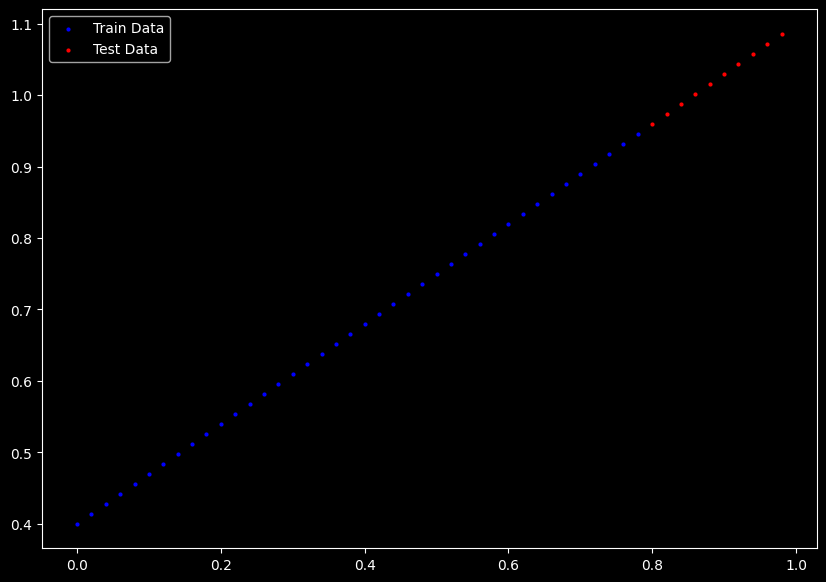

In [100]:
plot_predictions()

In [101]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32, requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [102]:
torch.manual_seed(42)
model = LinearRegression()
print(list(model.parameters()))
print(model.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1288])})


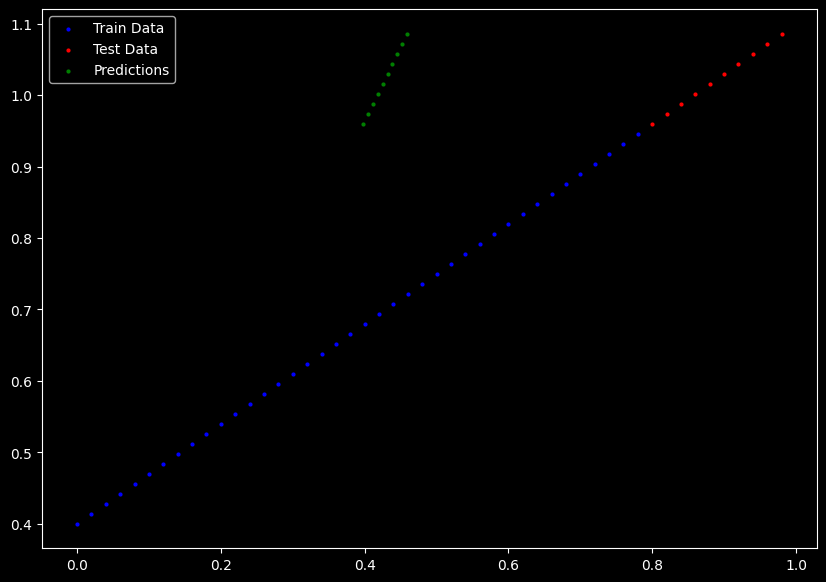

In [103]:
with torch.inference_mode():
    y_preds = model(x_test)
plot_predictions(predictions=y_preds)

In [104]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [105]:
torch.manual_seed(42)

epochs = 150
epoch_count = []
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()

    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    with torch.inference_mode():
        test_pred = model(x_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_losses.append(loss.detach().numpy())
        test_losses.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch}, Loss: {loss.item()}, Test Loss: {test_loss.item()}")


Epoch: 0, Loss: 0.41288137435913086, Test Loss: 0.5810651779174805
Epoch: 10, Loss: 0.2976713180541992, Test Loss: 0.4463551640510559
Epoch: 20, Loss: 0.18246141076087952, Test Loss: 0.3116453289985657
Epoch: 30, Loss: 0.07432593405246735, Test Loss: 0.18313124775886536
Epoch: 40, Loss: 0.04388336092233658, Test Loss: 0.11712293326854706
Epoch: 50, Loss: 0.03826197236776352, Test Loss: 0.0926765650510788
Epoch: 60, Loss: 0.034725259989500046, Test Loss: 0.08165650069713593
Epoch: 70, Loss: 0.03126085549592972, Test Loss: 0.07201018929481506
Epoch: 80, Loss: 0.027831759303808212, Test Loss: 0.06442452222108841
Epoch: 90, Loss: 0.02439604140818119, Test Loss: 0.05615197494626045
Epoch: 100, Loss: 0.020958269014954567, Test Loss: 0.04856633022427559
Epoch: 110, Loss: 0.017529824748635292, Test Loss: 0.04029378294944763
Epoch: 120, Loss: 0.014092418365180492, Test Loss: 0.032021235674619675
Epoch: 130, Loss: 0.010656332597136497, Test Loss: 0.02443559095263481
Epoch: 140, Loss: 0.007227607

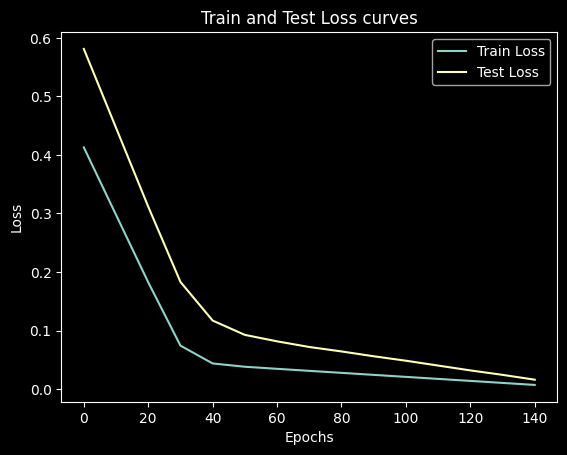

In [106]:
plt.plot(epoch_count, train_losses, label="Train Loss")
plt.plot(epoch_count, test_losses, label="Test Loss")
plt.title("Train and Test Loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [107]:
model.state_dict()

OrderedDict([('weights', tensor([0.6811])), ('bias', tensor([0.4078]))])

In [108]:
weight, bias

(0.7, 0.4)

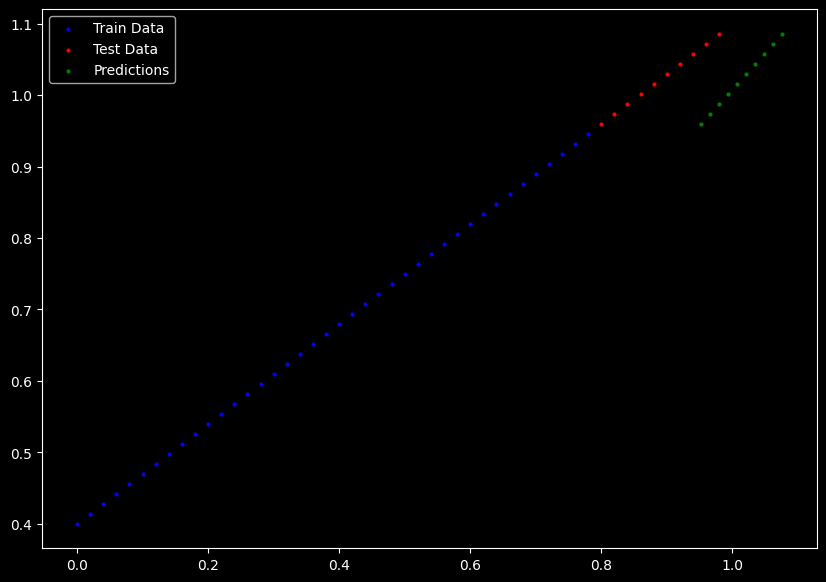

In [117]:
model.eval()

with torch.inference_mode():
    y_pred = model(x_test)

plot_predictions(predictions=y_pred)

In [119]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model.state_dict(), MODEL_SAVE_PATH)

In [120]:
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

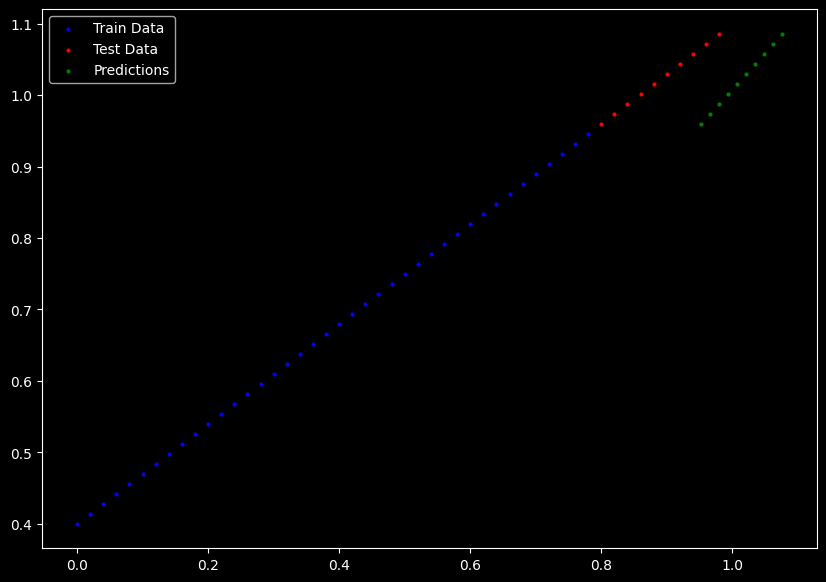

In [121]:
loaded_model.eval()

with torch.inference_mode():
    lm_preds = loaded_model(x_test)

plot_predictions(predictions=lm_preds)

In [123]:
y_preds, lm_preds

(tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
         0.4588]),
 tensor([0.9527, 0.9663, 0.9800, 0.9936, 1.0072, 1.0208, 1.0344, 1.0481, 1.0617,
         1.0753]))